In [17]:
import pandas as pd


file_path = '/content/flight_price.xlsx'
data = pd.read_excel(file_path)

data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [18]:

print(data.columns)



Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [19]:
import pandas as pd

data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Year'] = data['Date_of_Journey'].dt.year

data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M', errors='coerce')

data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'].str.extract(r'(\d{2}:\d{2})')[0], format='%H:%M', errors='coerce')

data['Dep_Hour'] = data['Dep_Time'].dt.hour
data['Dep_Minute'] = data['Dep_Time'].dt.minute
data['Arrival_Hour'] = data['Arrival_Time'].dt.hour
data['Arrival_Minute'] = data['Arrival_Time'].dt.minute

data = data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1)

def convert_duration_to_minutes(duration):
    duration = duration.split()
    hours = int(duration[0][:-1]) * 60
    minutes = int(duration[1][:-1]) if len(duration) > 1 else 0
    return hours + minutes

data['Duration_Minutes'] = data['Duration'].apply(convert_duration_to_minutes)

data = data.drop(['Duration'], axis=1)


data['Total_Stops'] = data['Total_Stops'].replace('non-stop', '0 stops')
data['Total_Stops'] = data['Total_Stops'].str.extract(r'(\d+)')
data['Total_Stops'] = data['Total_Stops'].fillna(0).astype(int)


data = data.drop(['Route', 'Additional_Info'], axis=1)

data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285


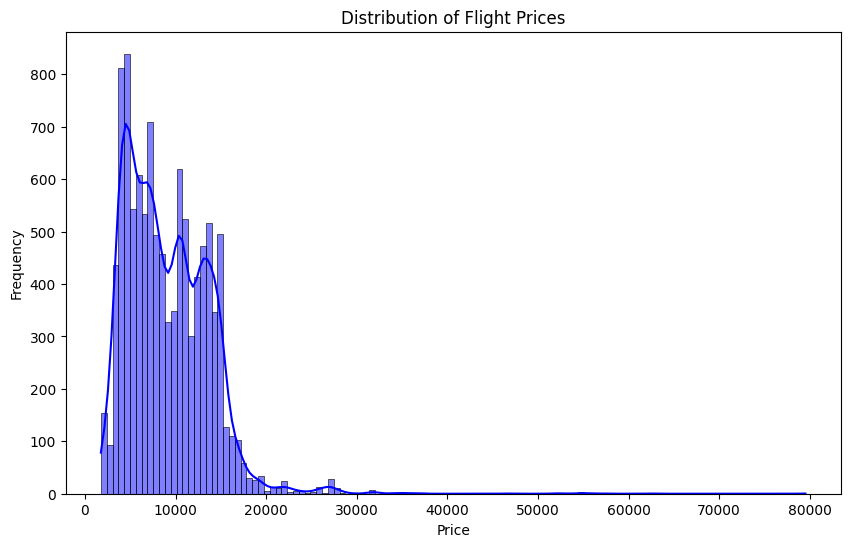

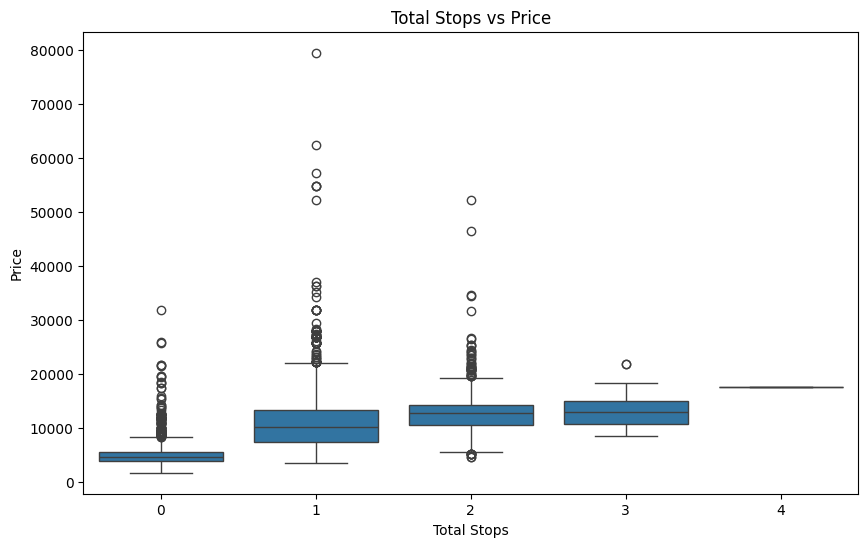

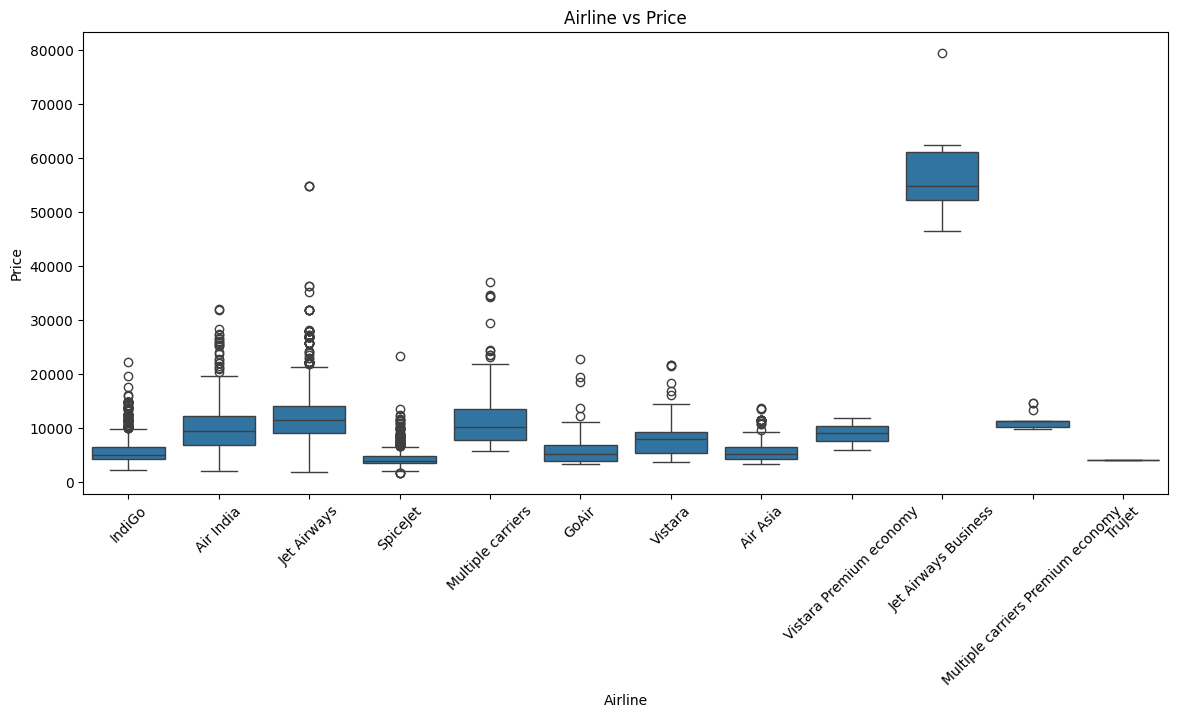

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title('Total Stops vs Price')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Airline', y='Price', data=data)
plt.title('Airline vs Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


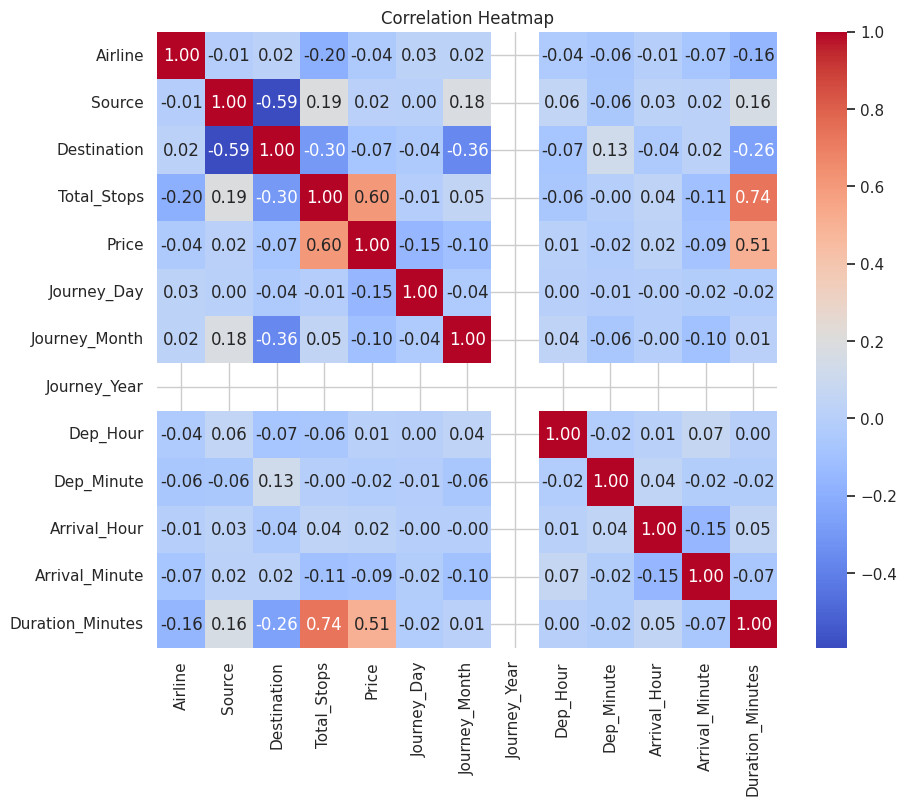

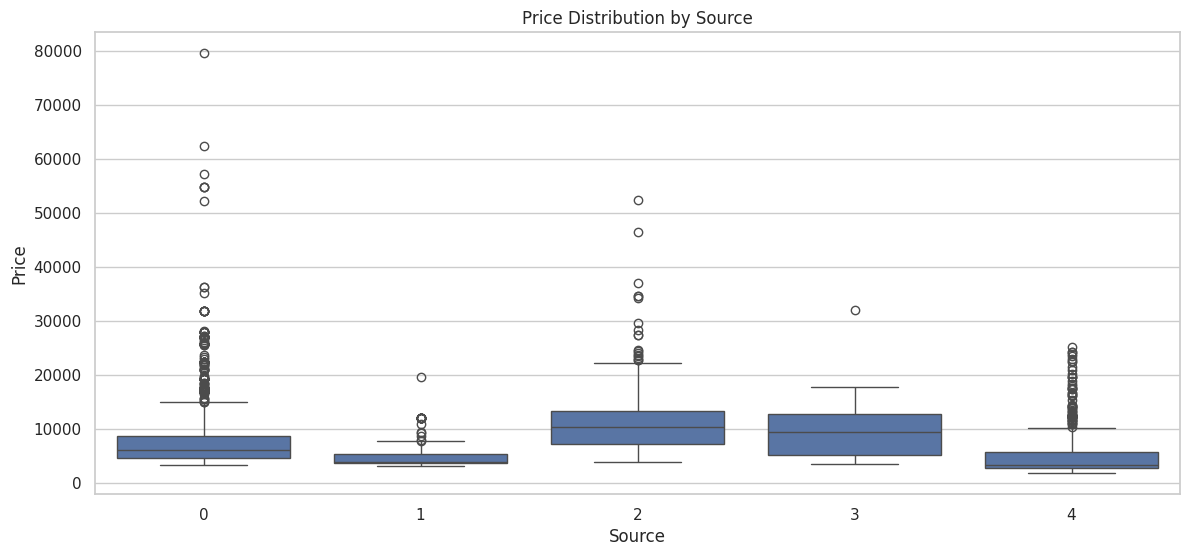

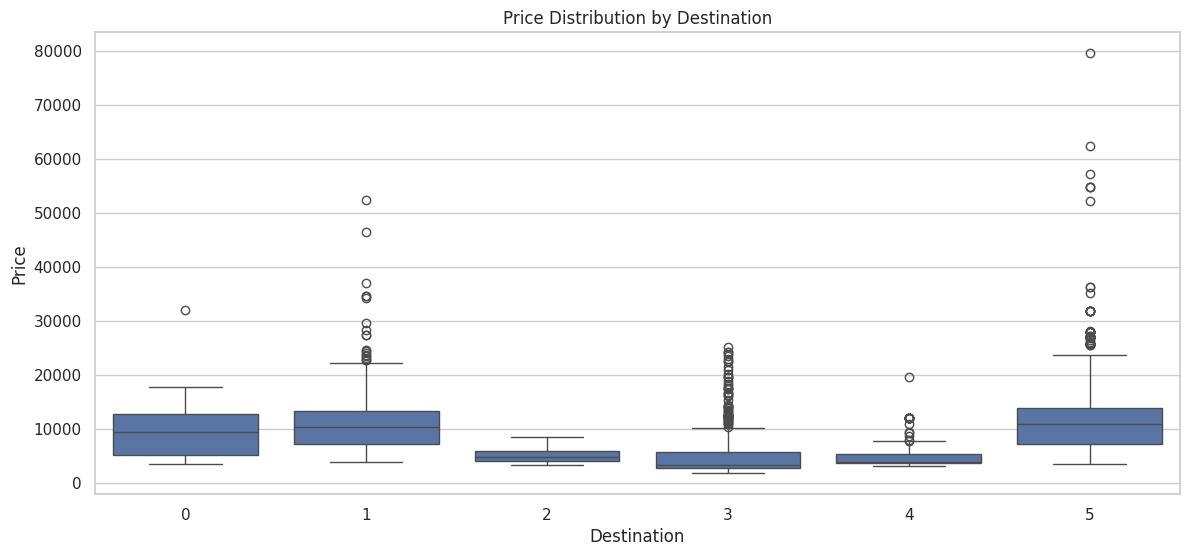

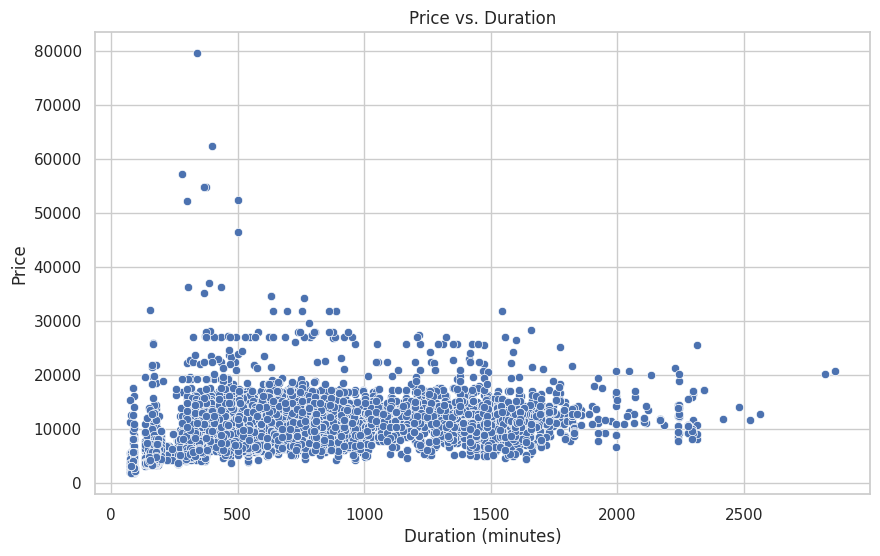

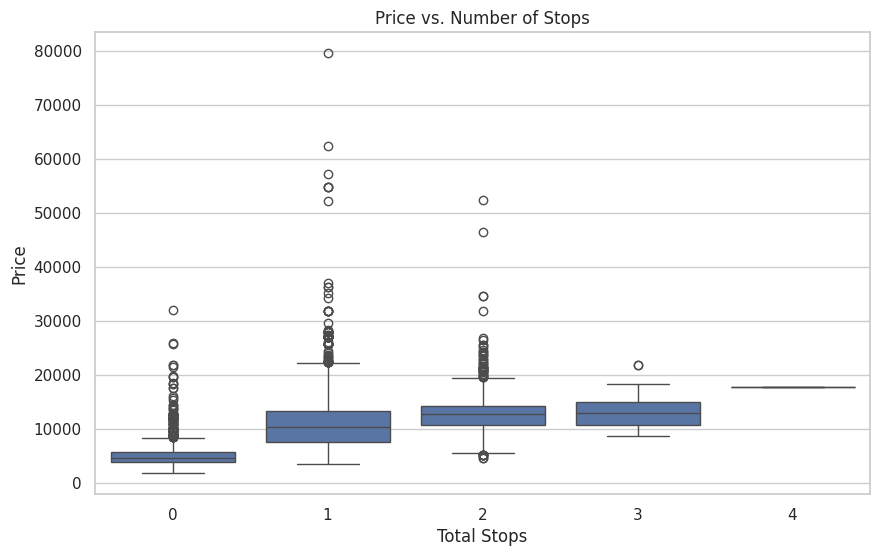

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


plt.figure(figsize=(14, 6))
sns.boxplot(x='Source', y='Price', data=data)
plt.title('Price Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Destination', y='Price', data=data)
plt.title('Price Distribution by Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Minutes', y='Price', data=data)
plt.title('Price vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title('Price vs. Number of Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score


label_encoder = LabelEncoder()
data['Airline'] = label_encoder.fit_transform(data['Airline'])
data['Source'] = label_encoder.fit_transform(data['Source'])
data['Destination'] = label_encoder.fit_transform(data['Destination'])
print(data.head())




   Airline  Source  Destination  Total_Stops  Price  Journey_Day  \
0        3       0            5            0   3897           24   
1        1       3            0            2   7662            1   
2        4       2            1            2  13882            9   
3        3       3            0            1   6218           12   
4        3       0            5            1  13302            1   

   Journey_Month  Journey_Year  Dep_Hour  Dep_Minute  Arrival_Hour  \
0              3          2019        22          20             1   
1              5          2019         5          50            13   
2              6          2019         9          25             4   
3              5          2019        18           5            23   
4              3          2019        16          50            21   

   Arrival_Minute  Duration_Minutes  
0              10               170  
1              15               445  
2              25              1140  
3              30 

In [33]:

X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}


results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'R2 Score': r2}

results_df = pd.DataFrame(results).T

print("Model Performance Comparison:")
print(results_df)


Model Performance Comparison:
                           MAE  R2 Score
Linear Regression  2472.569575  0.429723
Decision Tree      1438.159772  0.631533
Random Forest      1207.440649  0.793107
